**Eugene Abigail Setiawan - 0706022210061**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing dfset
- Download the **Bank Marketing dfset** from Elearn
- Upload the dfset to your own Github
- Import the dfset using URL from your Github

**METAdf** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier


## Load dfset

In [81]:
df = pd.read_csv('https://raw.githubusercontent.com/eabigails/Week7_DM/refs/heads/main/bank.csv', delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Exploratory df Analysis
Explore the df to identify patterns within the dfset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [82]:
# Check 'unknown' values per column
unknown_counts = df.apply(lambda x: (x == 'unknown').sum())
print("Unknown values per column:\n", unknown_counts)

# Replace 'admin.' and 'management' with a common label 'admin_management'
df['job'] = df['job'].replace(['admin.', 'management'], 'admin_management')

# Replace 'unknown' values in 'job' and 'education' with the most frequent value
df['job'].replace('unknown', df['job'].mode()[0], inplace=True)
df['education'].replace('unknown', df['education'].mode()[0], inplace=True)



Unknown values per column:
 age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


## Machine Learning

In [84]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [85]:
label_enc = LabelEncoder()
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']:
    df[col] = label_enc.fit_transform(df[col])

# Encode the target variable
df['y'] = label_enc.fit_transform(df['y'])


In [86]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,9,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,6,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,0,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,0,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [87]:
# Separate features and target
X = df.drop(columns=['y', 'duration'])
y = label_enc.fit_transform(df['y'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape


((3616, 15), (3616,))

In [88]:
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8939226519337017
Confusion Matrix:
 [[806   1]
 [ 95   3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       807
           1       0.75      0.03      0.06        98

    accuracy                           0.89       905
   macro avg       0.82      0.51      0.50       905
weighted avg       0.88      0.89      0.85       905



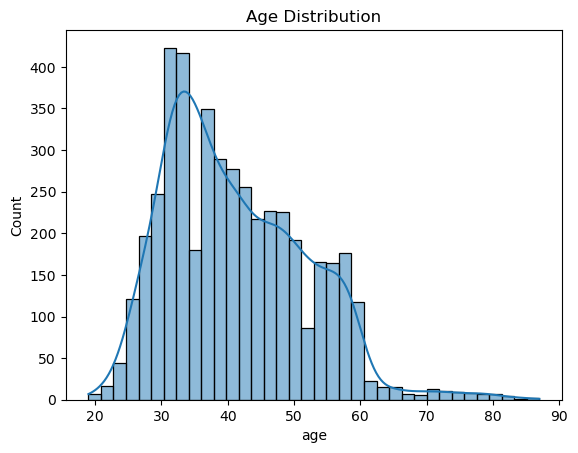

In [ ]:
sns.histplot(data=df, x='age', kde=True)
plt.title("Age Distribution")
plt.show()

# from this age distribution, we can conclude that people around the age 30-40 is most likely to sign for the bank

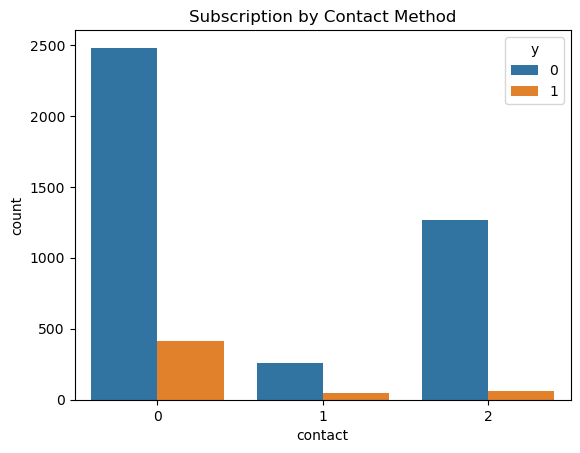

In [ ]:
sns.countplot(data=df, x='contact', hue='y')
plt.title("Subscription by Contact Method")
plt.show()

# people subscribe through their cellular more than the other ways

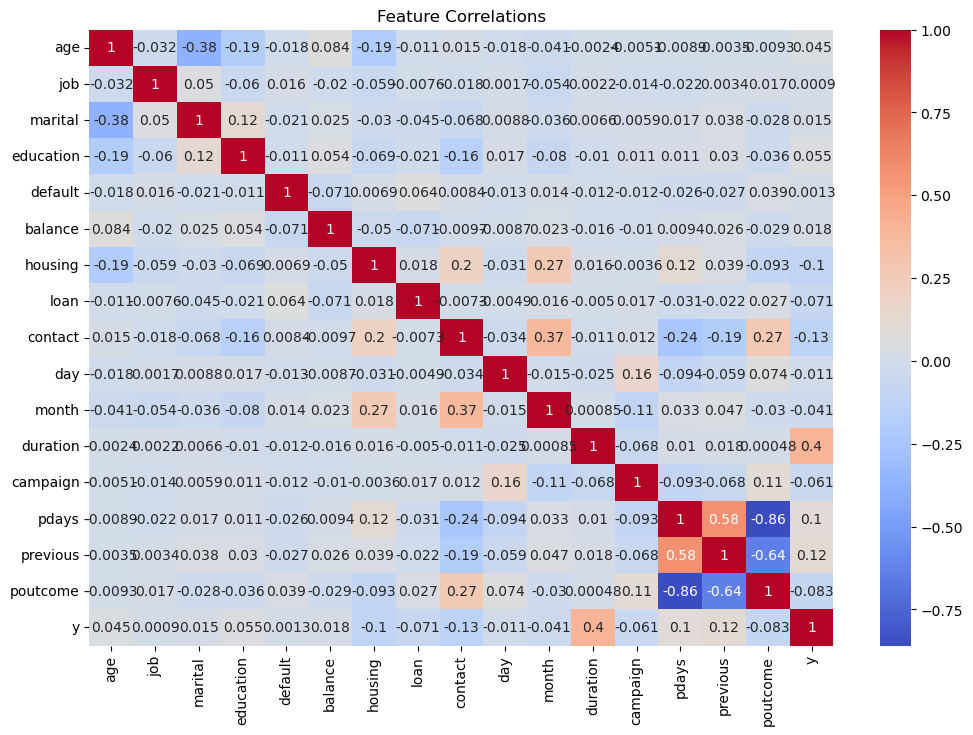

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()

# Strong Correlations:
# duration shows a strong positive correlation with the target variable y (0.4), indicating that longer call durations are associated with a higher likelihood of clients subscribing to term deposits.
#previous has a strong negative correlation with poutcome (-0.86), indicating that previous contacts negatively correlate with the outcome of the previous marketing campaign.

#Weak or No Correlation:

#Features like job, marital, and housing show weaker correlations with the target variable, suggesting they may not be strong predictors for whether a client subscribes.

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [92]:

# a. Define the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# b. Predict the test set results
y_pred_forest = model.predict(X_test)

# c. Check accuracy score
accuracy = accuracy_score(y_test, y_pred_forest)
print("Accuracy:", accuracy)

# d. Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_forest)
print("Confusion Matrix:\n", conf_matrix)

# e. Classification report
class_report = classification_report(y_test, y_pred_forest)
print("Classification Report:\n", class_report)

# f. Results and conclusion
print("The Random Forest model achieved an accuracy of {:.2f}%.".format(accuracy * 100))

Accuracy: 0.8994475138121547
Confusion Matrix:
 [[802   5]
 [ 86  12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.95       807
           1       0.71      0.12      0.21        98

    accuracy                           0.90       905
   macro avg       0.80      0.56      0.58       905
weighted avg       0.88      0.90      0.87       905

The Random Forest model achieved an accuracy of 89.94%.


## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

Accuracy: 0.8961325966850828
Confusion Matrix:
 [[797  10]
 [ 84  14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       807
           1       0.58      0.14      0.23        98

    accuracy                           0.90       905
   macro avg       0.74      0.57      0.59       905
weighted avg       0.87      0.90      0.87       905

The Gradient Boosting model achieved an accuracy of 89.61%.
Confusion Matrix and Classification Report provide insights into how well the model classified each class.


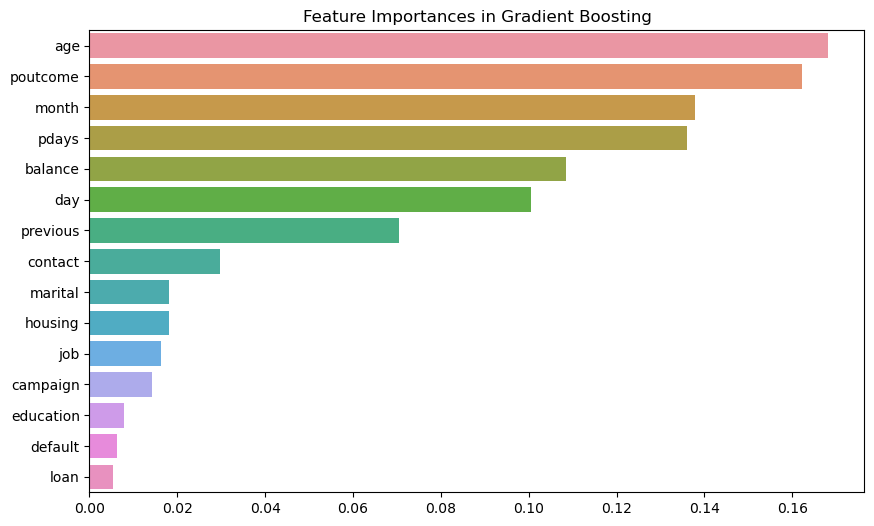

In [93]:
# a. Define the Gradient Boosting Classifier model
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# b. Predict on the test set
y_pred_gradient = model.predict(X_test)

# c. Check accuracy score
accuracy = accuracy_score(y_test, y_pred_gradient)
print("Accuracy:", accuracy)

# d. Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gradient)
print("Confusion Matrix:\n", conf_matrix)

# e. Classification report
class_report = classification_report(y_test, y_pred_gradient)
print("Classification Report:\n", class_report)

# f. Results and conclusion
# Interpretation of the results
print("The Gradient Boosting model achieved an accuracy of {:.2f}%.".format(accuracy * 100))
print("Confusion Matrix and Classification Report provide insights into how well the model classified each class.")

feature_importances = model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_indices], y=X.columns[sorted_indices])
plt.title("Feature Importances in Gradient Boosting")
plt.show()

Conclusion

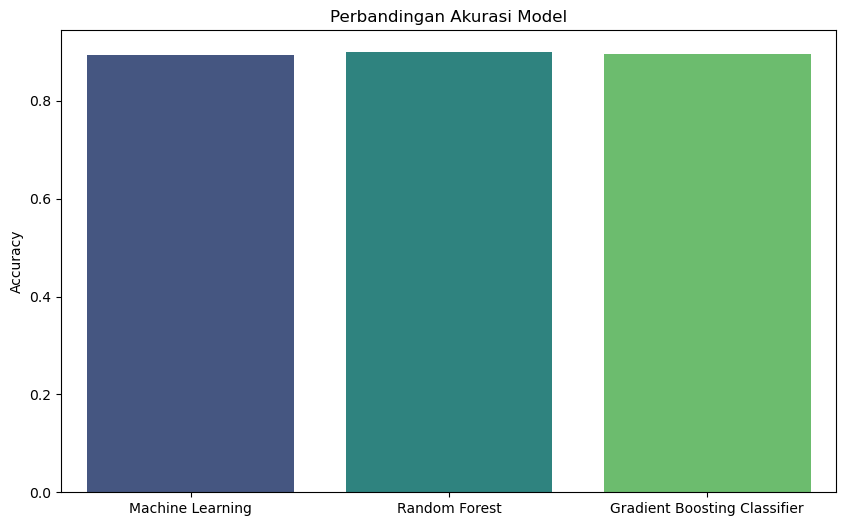

In [ ]:
accuracy_scores = {
    "Machine Learning": accuracy_score(y_test, y_pred),
    "Random Forest": accuracy_score(y_test, y_pred_forest),
    "Gradient Boosting Classifier": accuracy_score(y_test, y_pred_gradient)
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')
plt.ylabel("Accuracy")
plt.title("Perbandingan Akurasi Model")
plt.show()

# there is no much gap between the 3 models